<a href="https://colab.research.google.com/github/IagoAlmeida-ias/Python-para-Data-Science/blob/main/Desafio_Arvore_Des.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://lmarena.ai/leaderboard
https://news.smol.ai/
https://github.com/trending/
https://www.reddit.com/r/LocalLLaMA/
# ↑↑↑↑↑↑

# Sarima
#

In [ ]:
# Pacotes de Preparação de Dados

import pandas as pd
import numpy as np


# Pacotes Gráficos

import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de Modelagem Estatistica

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Módulo Análise Exploratória -- Análise I.V (Information Value)

import aed

In [ ]:
# Impostação da base de dados

df = pd.read_csv('iris2.csv')

In [ ]:
# Primeiras 5 linhas

df.head()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,Tipo_Orquidea
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Ultimas 5 linhas

df.tail()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,Tipo_Orquidea
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0
149,5.9,3.0,5.1,1.8,0


In [ ]:
# Infomações do DF

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   comprimento_sepala  150 non-null    float64
 1   largura_sepala      150 non-null    float64
 2   comprimento_petala  150 non-null    float64
 3   largura_petala      150 non-null    float64
 4   Tipo_Orquidea       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# Qt Linhas e colunas

df.shape

(150, 5)

In [ ]:
# Verificando Duplicadas

df.duplicated().sum()

np.int64(1)

In [ ]:
# Descrição do DF

df.describe().round()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,Tipo_Orquidea
count,150.0,150.0,150.0,150.0,150.0
mean,6.0,3.0,4.0,1.0,0.0
std,1.0,0.0,2.0,1.0,0.0
min,4.0,2.0,1.0,0.0,0.0
25%,5.0,3.0,2.0,0.0,0.0
50%,6.0,3.0,4.0,1.0,0.0
75%,6.0,3.0,5.0,2.0,1.0
max,8.0,4.0,7.0,2.0,1.0


In [ ]:
# Verificando missing values

df.isnull().sum()

,0
comprimento_sepala,0
largura_sepala,0
comprimento_petala,0
largura_petala,0
Tipo_Orquidea,0


In [ ]:
# Alterando nome das colunas

colunas = ['comprimento_sepala', 'largura_sepala', 'comprimento_petala',
       'largura_petala', 'tipo_orquidea']

df.columns = colunas

In [ ]:
# ter uma idea dos Tipo de Orquidea

df.query('tipo_orquidea == 1').count()

,0
comprimento_sepala,50
largura_sepala,50
comprimento_petala,50
largura_petala,50
tipo_orquidea,50


In [ ]:
df_lar = df.groupby('largura_sepala')['tipo_orquidea'].count().sort_values(ascending=False)

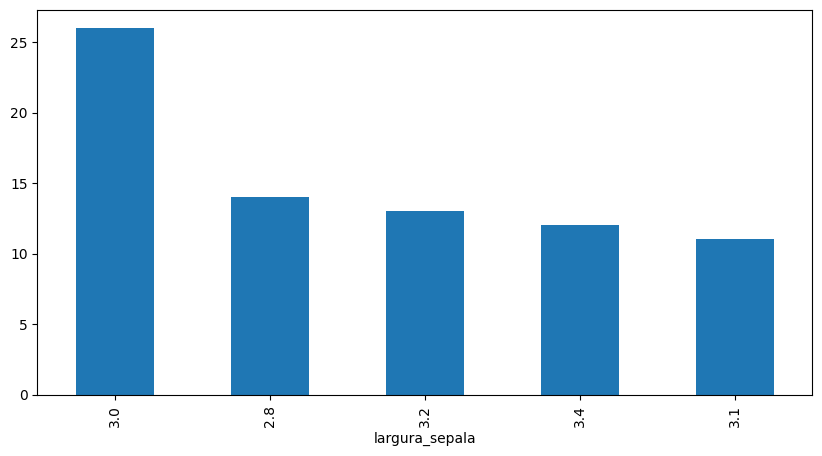

In [ ]:
df_lar.head().plot(kind='bar',figsize=(10,5));

In [ ]:
df_comp = df.groupby('comprimento_petala')['tipo_orquidea'].count().sort_values(ascending=False)

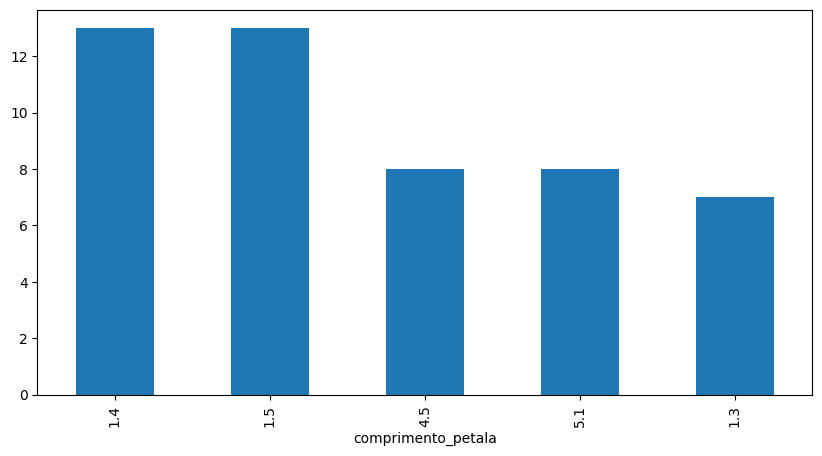

In [ ]:
df_comp.head().plot(kind='bar',figsize=(10,5));

In [ ]:
df_larP = df.groupby('largura_petala')['tipo_orquidea'].count().sort_values(ascending=True)

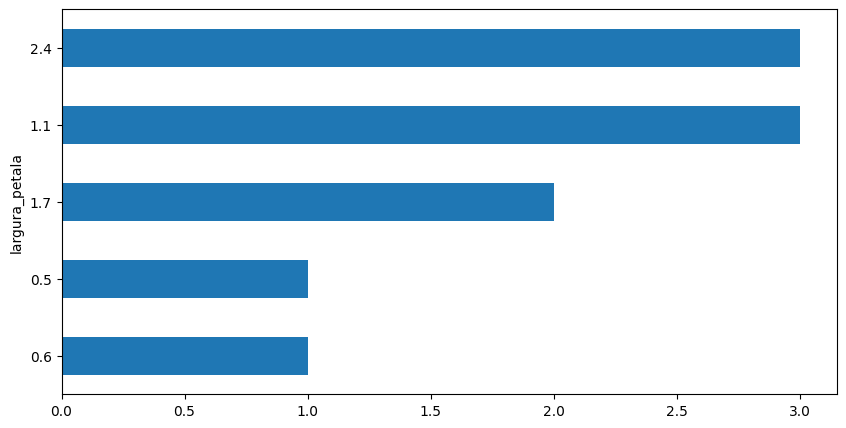

In [ ]:
df_larP.head().plot(kind='barh',figsize=(10,5));

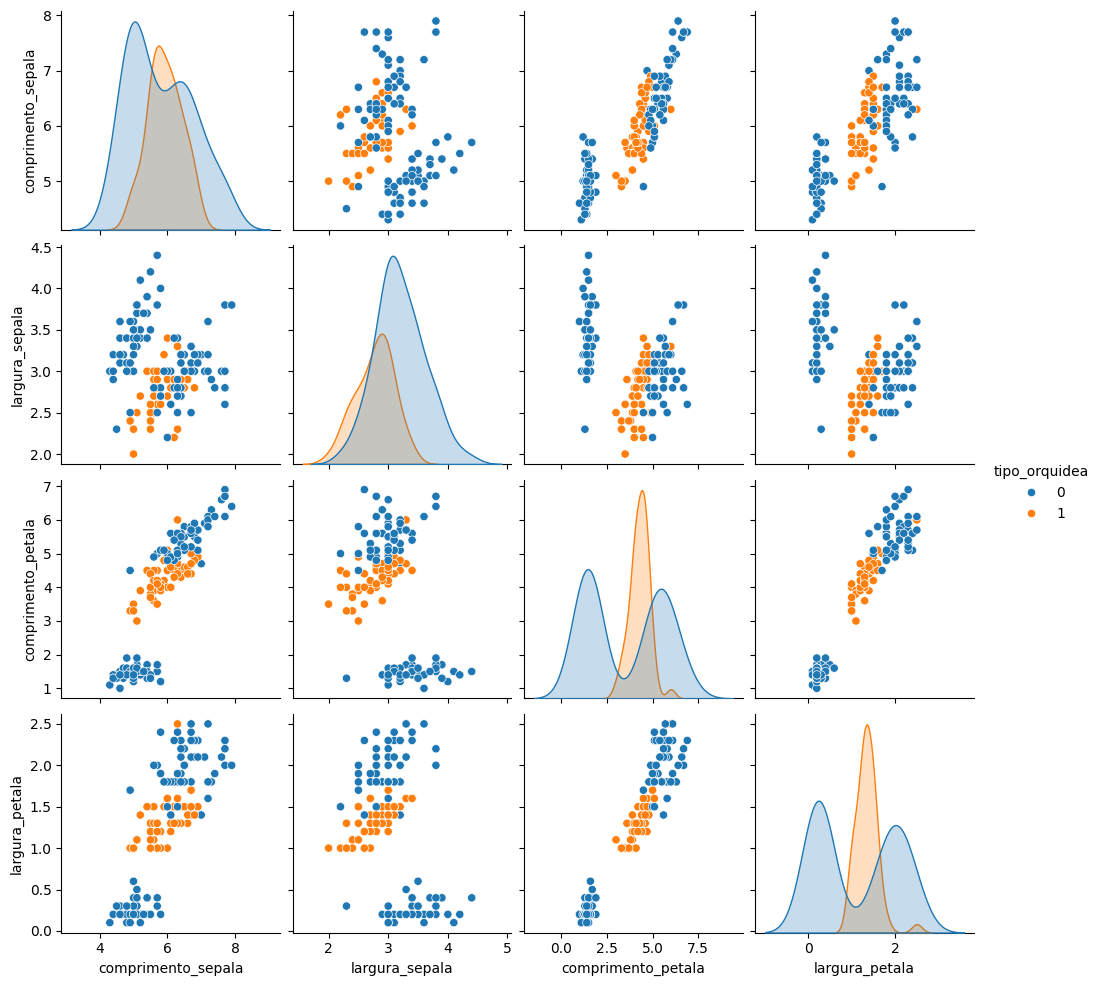

In [ ]:
sns.pairplot(df, hue='tipo_orquidea')

In [ ]:
df_rh = aed.analise_iv(df, 'tipo_orquidea')
df_rh.get_lista_iv()

/content/aed.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = df_aux.pivot_table(values='target2',
/content/aed.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = df_aux.pivot_table(values='target2',
/content/aed.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = df_aux.pivot_table(values='target2',
/content/aed.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silenc

tipo_orquidea,IV
Variavel,
largura_petala,4.16
comprimento_petala,3.99
largura_sepala,0.60
comprimento_sepala,0.57


# Treinamento da Árvore de Decisão

In [ ]:
# Target (Variável Resposta/Dependente)

y = df['tipo_orquidea']

# Features (Variavel Explicativa/Independentes)

x = df.drop('tipo_orquidea',
            axis=1)

In [ ]:
# Modelagrm Ajuste do Modelo

modelo = DecisionTreeClassifier(max_depth=2,random_state=42)
modelo.fit(x,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

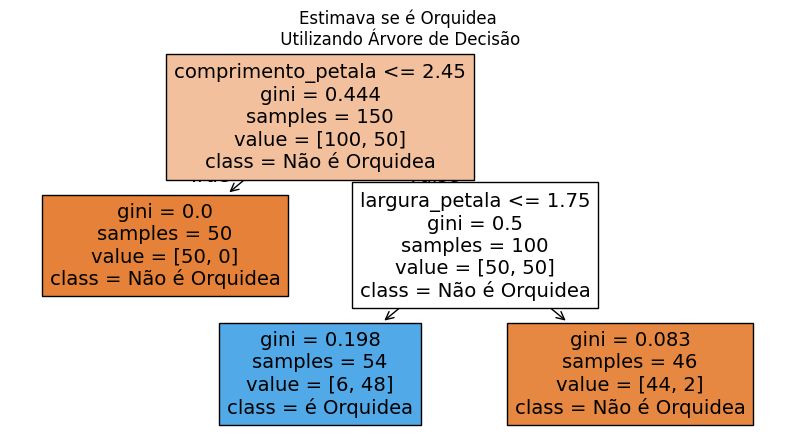

In [ ]:
# Interpretação do Modelo

plt.figure(figsize=(10,5))
tree.plot_tree(modelo,
               feature_names=x.columns,
               class_names=['Não é Orquidea','é Orquidea'],
               filled=True);
plt.title('Estimava se é Orquidea\n Utilizando Árvore de Decisão');

In [ ]:
# Desempenho do Modelo: Acurácia --------------- Matriz de confução

accuracy_score(y, modelo.predict(x))

0.9466666666666667